In [1]:
from sklearn.datasets import make_regression
import numpy as np

# Set seed of data
np.random.seed(0)

X, y = make_regression(n_samples=100, n_features=1, noise=20)

X = np.interp(X, (X.min(), X.max()), (20, 80))
y = np.interp(y, (y.min(), y.max()), (100, 500))

X = np.hstack((np.ones(shape=(len(X), 1)), X))

$$\textbf{Analytical} $$

In [3]:
ls = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_hat_a = X.dot(ls)

$$ \textbf{Gradient Descent} $$

In [4]:
def calc_gradient(thetas, x, y):
    y_hat = x.dot(thetas).flatten()
    error = y.flatten() - y_hat
    gradient = -(1.0/len(x)) * error.dot(x)
    
    mse = np.mean(error**2)
    
    return gradient, mse

thetas = [0, 0]
iter_count = 0
lr = 0.0001
tolerance = 0.001

while True:
    gradient, error = calc_gradient(thetas, X, y)
    thetas_hat = thetas - lr * gradient
    
    if np.sum(abs(thetas_hat - thetas)) < tolerance:
        print('Converged')
        break
        
    thetas = thetas_hat
    
    if iter_count % 10 == 0:
        print('Iteration: %i - error %.3f' % (iter_count, error))
        
    iter_count += 1
    
y_hat_g = X.dot(thetas)

Iteration: 0 - error 110744.006
Iteration: 10 - error 1641.860
Iteration: 20 - error 1531.052
Converged


$$ \textbf{sklearn} $$

In [5]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression().fit(X[:,1].reshape(-1,1), y)
y_hat_s = regr.predict(X[:,1].reshape(-1,1))

$$ \textbf{Comparison} $$

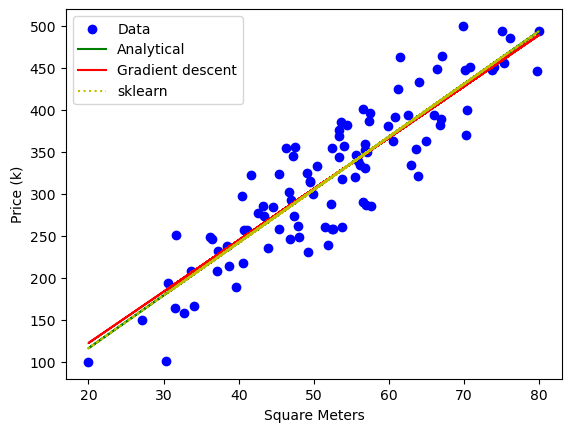

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:,1], y, c='b', label='Data')

plt.plot(X[:,1], y_hat_a, c='g', label='Analytical')
plt.plot(X[:,1], y_hat_g, c='r', label='Gradient descent')
plt.plot(X[:,1], y_hat_s, c='y', linestyle='dotted', label='sklearn')
plt.legend(loc='best')

plt.xlabel('Square Meters')
plt.ylabel('Price (k)')
plt.show()